In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
cleaned_weather_data = 'C:/Users/kuohe/ClimateWins/02 Data/cleaned_weather_data.csv'
cleaned_weather_data = pd.read_csv(cleaned_weather_data)

In [3]:
pleasant_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'
pleasant_weather_data = pd.read_csv(pleasant_weather_data_path)

In [4]:
pleasant_weather_data

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
pleasant_weather_data.drop(columns=['DATE'], inplace=True)

In [6]:
df= pd.concat([cleaned_weather_data, pleasant_weather_data], axis=1)

In [7]:
subset = df.sample(n=1000)

In [8]:
subset.shape

(1000, 150)

In [9]:
y = subset.iloc[:,-15:]

X = subset.iloc[:,:-15]

In [10]:
X.shape

(1000, 135)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 135)

In [13]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [14]:
y_pred = clf.predict(X_test)

print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5133333333333333


In [15]:
importance = clf.feature_importances_

In [16]:
clf.feature_importances_.shape

(135,)

In [17]:
importance = importance.reshape(-1,15,9)

In [18]:
importance

array([[[0.0035431 , 0.00305353, 0.00280115, 0.00461744, 0.01332918,
         0.00670773, 0.02531932, 0.00757618, 0.03088789],
        [0.00375395, 0.00431922, 0.00402297, 0.00346227, 0.0102297 ,
         0.00374142, 0.007612  , 0.00326562, 0.00757139],
        [0.00242053, 0.00227707, 0.00230643, 0.00331822, 0.00912045,
         0.0044042 , 0.00733178, 0.00574915, 0.00509355],
        [0.00585245, 0.00257653, 0.00371498, 0.00489477, 0.0096256 ,
         0.00580585, 0.00964148, 0.0028971 , 0.03052381],
        [0.00688589, 0.00606881, 0.00307982, 0.00573589, 0.01697807,
         0.00562916, 0.02711208, 0.00284298, 0.04062265],
        [0.00345783, 0.00366005, 0.00348727, 0.00516319, 0.00676506,
         0.005023  , 0.01529013, 0.00578121, 0.01267889],
        [0.00341177, 0.00278728, 0.00449719, 0.0109291 , 0.00561476,
         0.00917478, 0.00333148, 0.01101145, 0.00306547],
        [0.00354698, 0.00307111, 0.00422154, 0.01308864, 0.00523623,
         0.01491713, 0.0075092 , 0.0199999

In [19]:
station_importances = np.sum(importance[0], axis=1)

In [20]:
station_importances

array([0.09783552, 0.04797854, 0.04202137, 0.07553257, 0.11495535,
       0.06130663, 0.05382327, 0.07861795, 0.1073575 , 0.06362543,
       0.08891811, 0.05336495, 0.03529119, 0.04853552, 0.03083611])

In [21]:
pleasant_weather_data.columns[0].split("_")[0]

'BASEL'

In [22]:
c = pleasant_weather_data.columns

In [23]:
BASEL = c[0]

In [24]:
BASEL.split("_")

['BASEL', 'pleasant', 'weather']

In [25]:
split = BASEL.split("_")

In [26]:
split[0]

'BASEL'

In [27]:
pleasant_weather_data

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
stations = [col.split("_")[0] for col in pleasant_weather_data.columns]

In [29]:
stations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [30]:
cleaned_weather_data.columns[0]

'BASEL_cloud_cover'

In [31]:
BASEL_columns = cleaned_weather_data.columns[:9]

In [32]:
BASEL_columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [33]:
BASEL_columns[0].replace('BASEL_', "")

'cloud_cover'

In [34]:
attributes = [col.replace('BASEL_', "") for col in BASEL_columns]

In [35]:
attributes

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

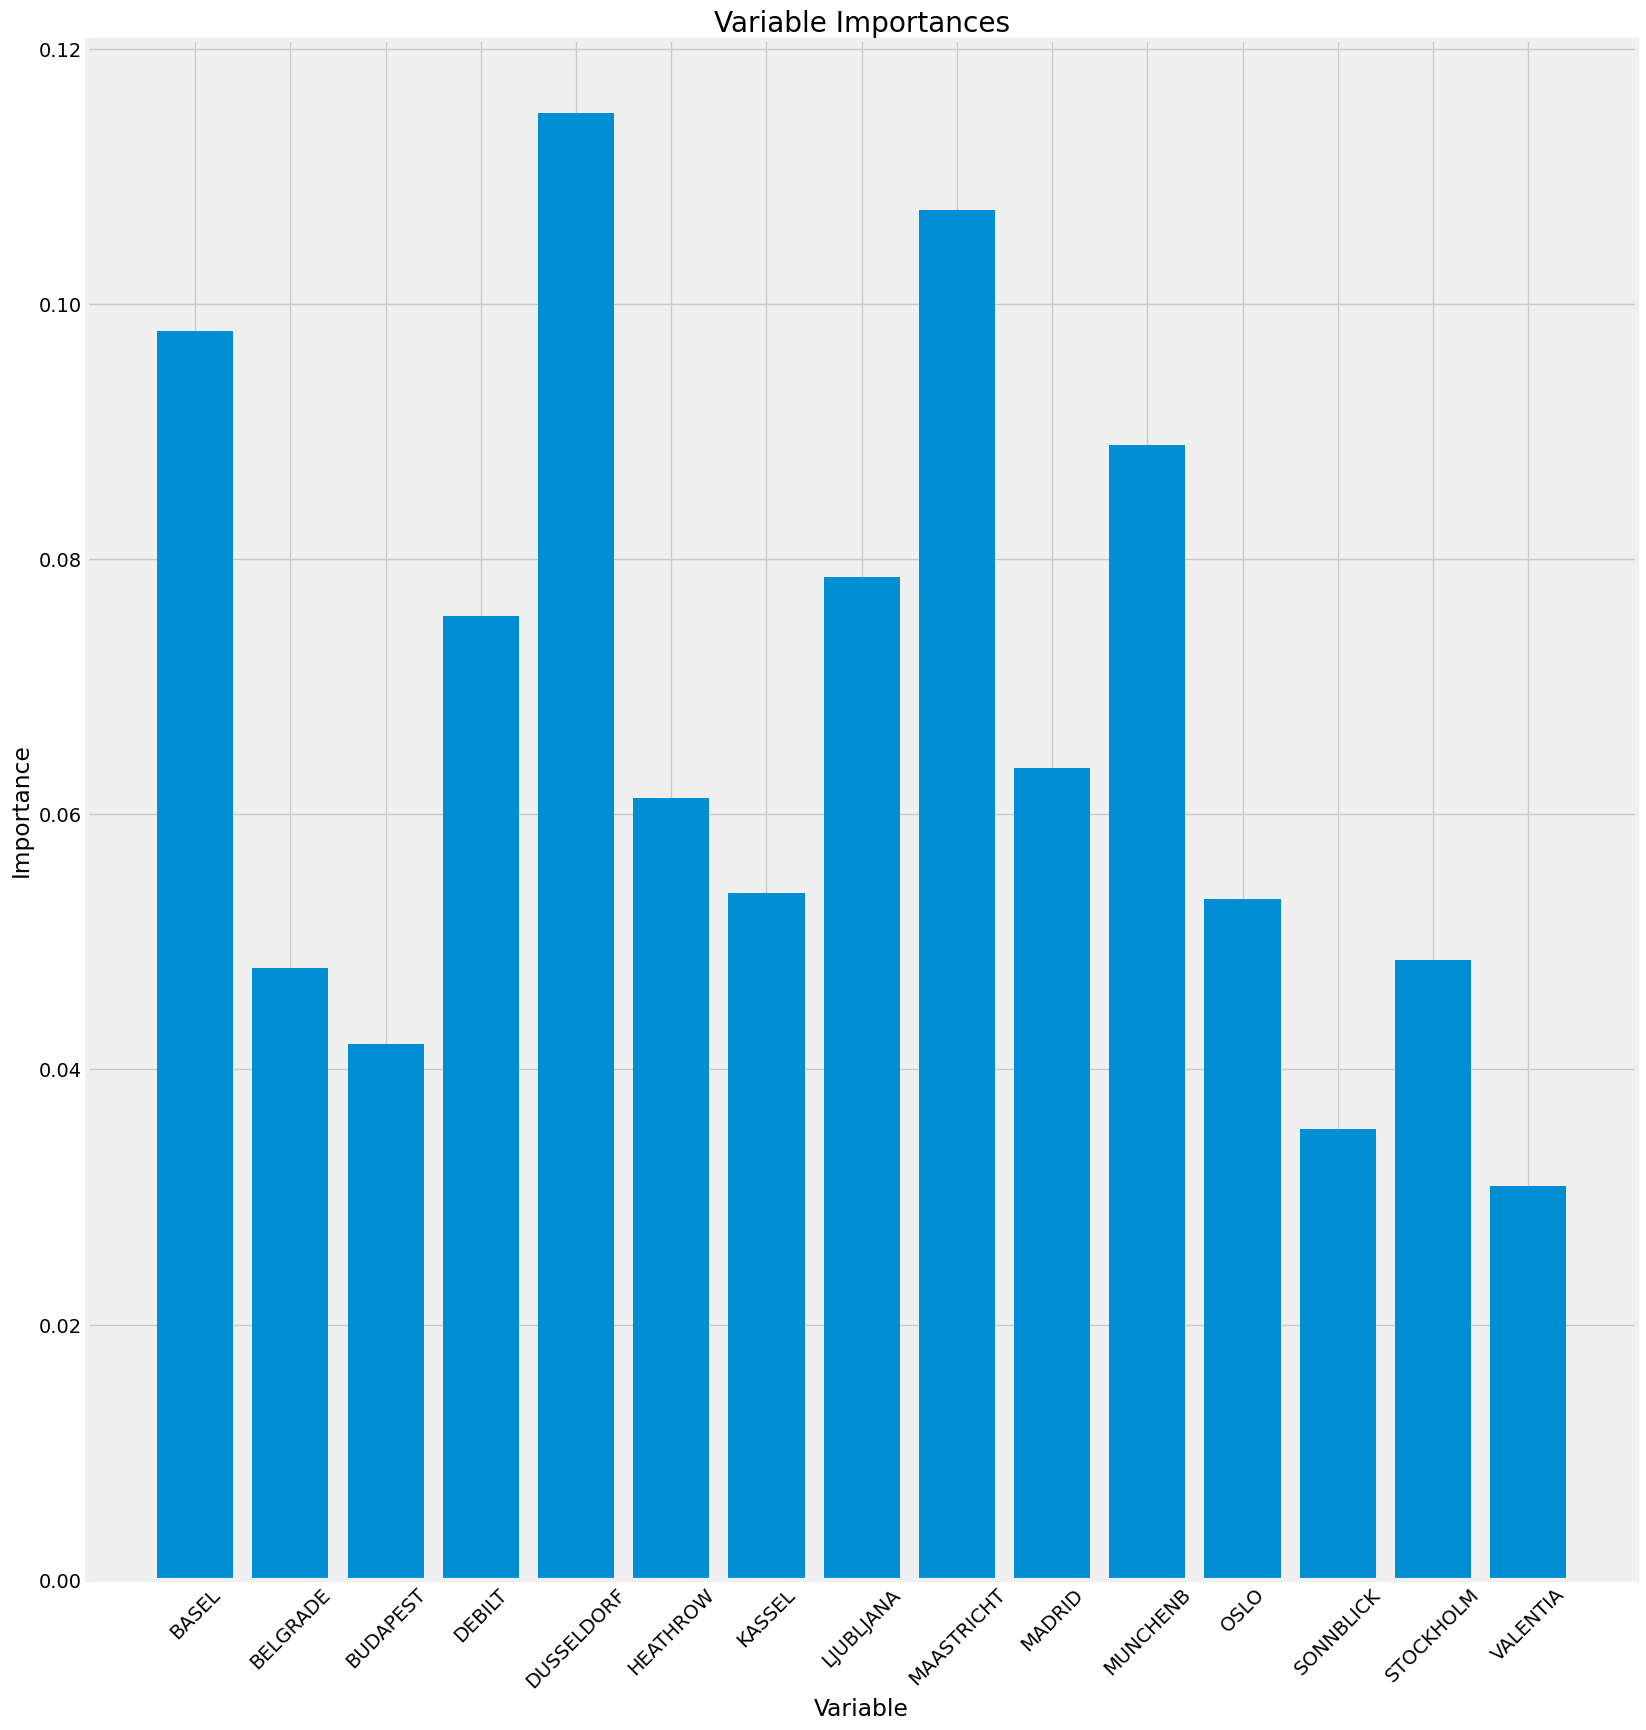

In [36]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(station_importances)))

plt.bar(x_values, station_importances, orientation = 'vertical')
plt.xticks(x_values, stations, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [37]:
importance = clf.feature_importances_.reshape(-1, 15, 9)

station_importances = np.sum(importance[0], axis=1)

stations = [col.split("_")[0] for col in df.columns if '_pleasant_weather' in col]

# Identify the top three stations
top_stations_idx = np.argsort(station_importances)[-3:]
top_stations = [stations[i] for i in top_stations_idx]

print("Top 3 weather stations:", top_stations)

Top 3 weather stations: ['BASEL', 'MAASTRICHT', 'DUSSELDORF']


In [38]:
#subset
for station in top_stations:
    station_columns = [col for col in df.columns if col.startswith(station)]
    if 'target' in df.columns:
        station_columns.append('target') 
    
    station_data = df[station_columns]
    
    X_station = station_data.iloc[:, :-1]
    y_station = station_data.iloc[:, -1]
    
    X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    clf_station.fit(X_train_station, y_train_station)

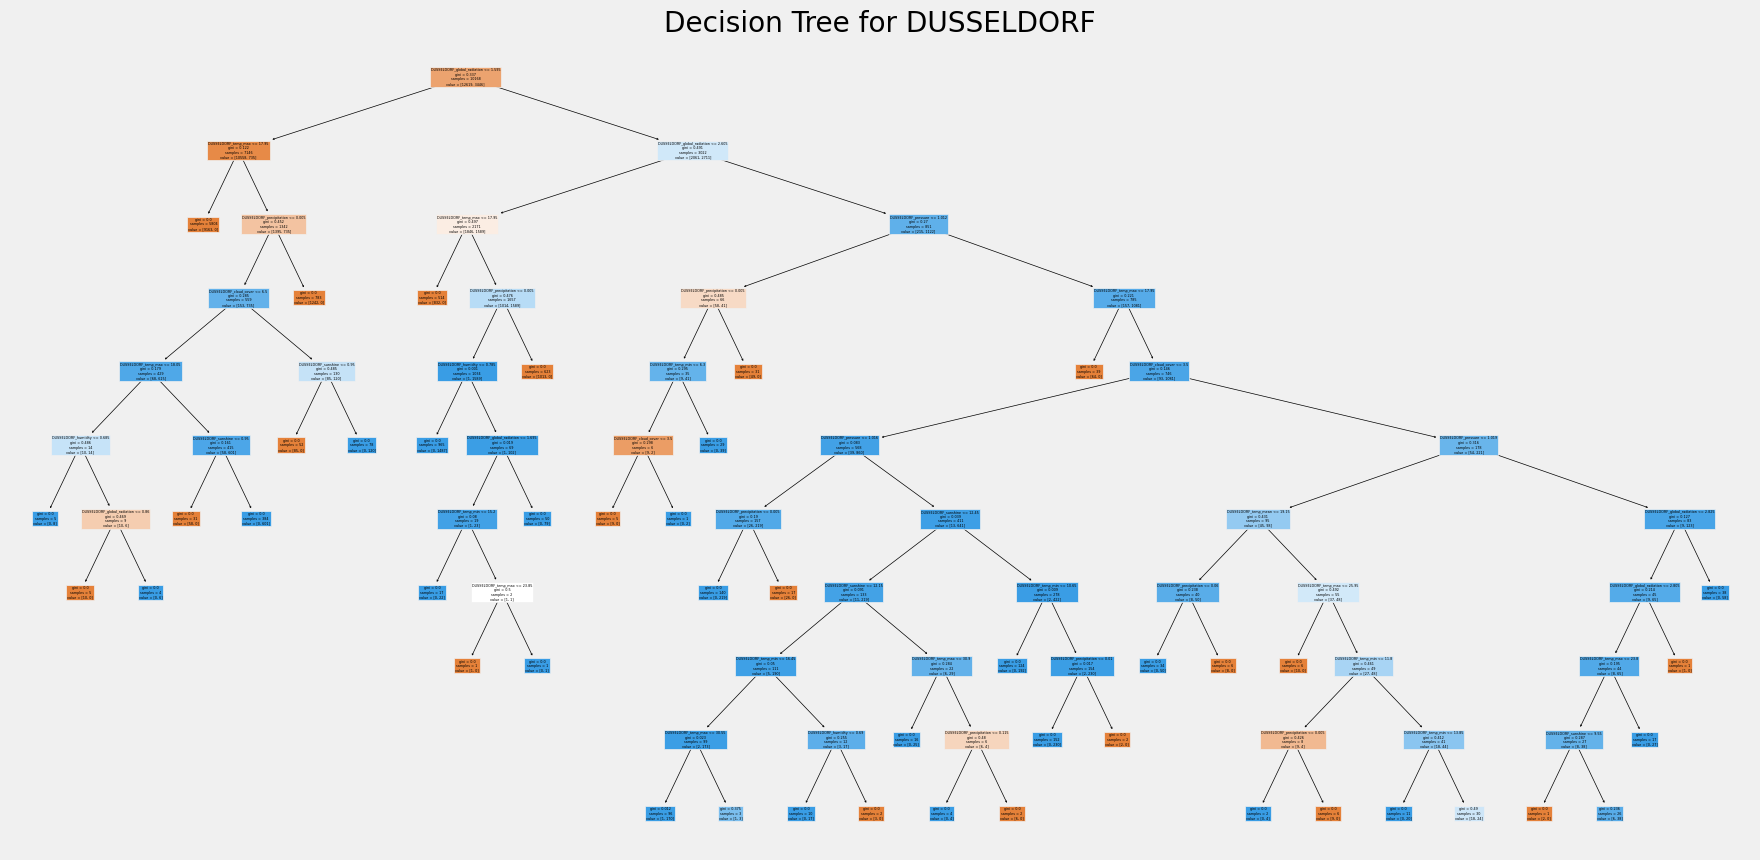

Model Accuracy for DUSSELDORF:  1.0


In [39]:
 # Plot a tree from the station-specific model
plt.figure(figsize=(20, 10))
plot_tree(clf_station.estimators_[0], feature_names=station_columns[:-1], filled=True)
plt.title(f'Decision Tree for {station}')
plt.show()
    
y_pred_station = clf_station.predict(X_test_station)
print(f"Model Accuracy for {station}: ", metrics.accuracy_score(y_test_station, y_pred_station))

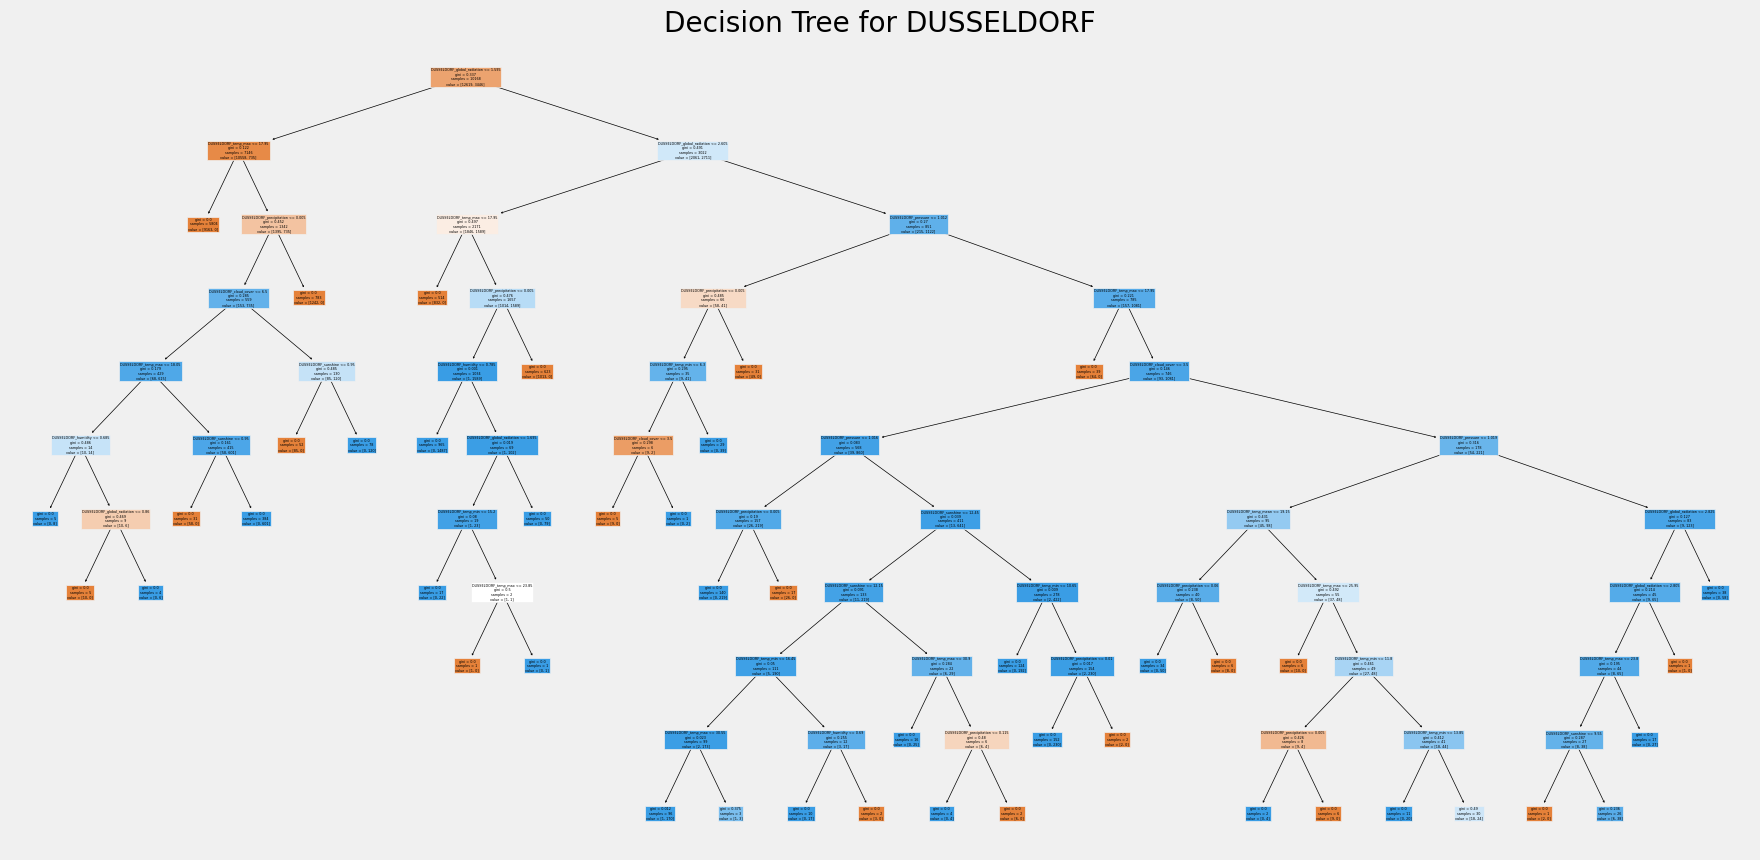

Model Accuracy for DUSSELDORF:  1.0


In [40]:
station = "DUSSELDORF"
station_columns = [col for col in df.columns if col.startswith(station)]
if 'target' in df.columns:
    station_columns.append('target')

station_data = df[station_columns]

X_station = station_data.iloc[:, :-1]
y_station = station_data.iloc[:, -1]

X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)

clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_station.fit(X_train_station, y_train_station)

plt.figure(figsize=(20, 10))
plot_tree(clf_station.estimators_[0], feature_names=station_columns[:-1], filled=True)
plt.title(f'Decision Tree for {station}')
plt.show()

#accuracy for the DUSSELDORF station model
y_pred_station = clf_station.predict(X_test_station)
print(f"Model Accuracy for {station}: ", metrics.accuracy_score(y_test_station, y_pred_station))

In [41]:

print(cleaned_weather_data.head())

print(cleaned_weather_data.columns)

   BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_pressure  \
0

# EXERCISE 2.4 Random Forest

In [42]:
cleaned_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/cleaned_weather_data.csv'
pleasant_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'

cleaned_weather_data = pd.read_csv(cleaned_weather_data_path)
pleasant_weather_data = pd.read_csv(pleasant_weather_data_path)

In [43]:
X = cleaned_weather_data
y = pleasant_weather_data.drop('DATE', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rf = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
               'n_estimators':[10,100,200],
               'max_features':[1,3,5,7],
               'min_samples_leaf':[2,3],
               'min_samples_split':[2,3]
           }

In [46]:
start = time.time()
grid = GridSearchCV(rf, param_grid=grid_space,cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Search took 4.743504651387533 minutes


In [47]:
best_params = grid.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [48]:
best_rf = grid.best_estimator_

In [49]:
y_pred = best_rf.predict(X_test)

In [50]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6511982570806101


In [51]:
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, criterion = 'entropy')
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=200)

In [52]:
y_pred = clf3.predict(X_test)
  
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6562091503267974


In [53]:
feature_importances = best_rf.feature_importances_
features = X.columns

In [54]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

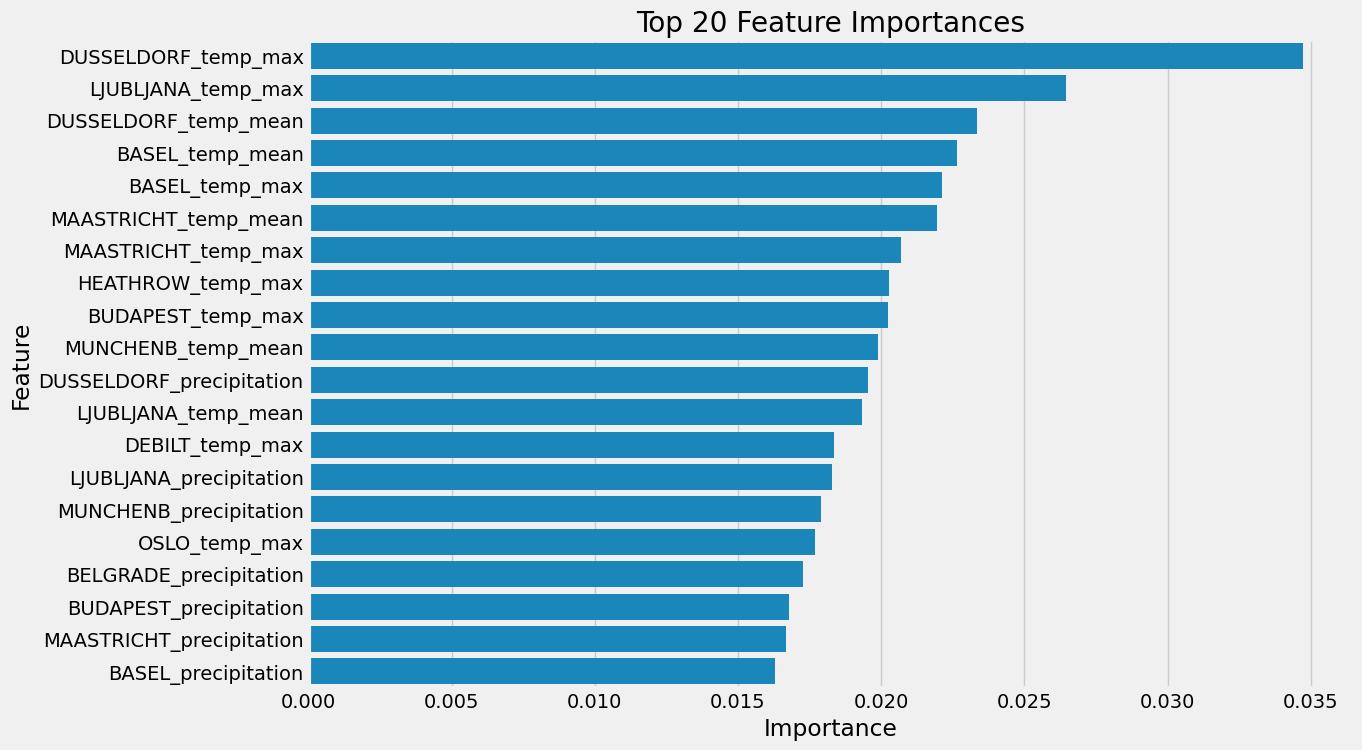

In [55]:
top_n = 20 
top_features_df = importance_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [56]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00256596, 0.00253344, 0.00164623, 0.00588216, 0.01586616,
       0.00804178, 0.02133853, 0.00655446, 0.02308822, 0.00301055,
       0.00291771, 0.00304304, 0.00386788, 0.01677308, 0.00352576,
       0.01346997, 0.00518659, 0.01516234, 0.00118778, 0.00143274,
       0.00144757, 0.00362714, 0.01453093, 0.00302762, 0.01468997,
       0.00705335, 0.01638211, 0.00313623, 0.00209339, 0.0046108 ,
       0.00445243, 0.01403384, 0.00458134, 0.01262032, 0.00418816,
       0.03422736, 0.00358264, 0.00263208, 0.00316914, 0.00552463,
       0.01578589, 0.00652677, 0.02299818, 0.00431151, 0.02930944,
       0.00157581, 0.00284151, 0.00389136, 0.0038796 , 0.00959402,
       0.00343447, 0.01280453, 0.00243969, 0.01209453, 0.00272068,
       0.0028546 , 0.00309648, 0.0126601 , 0.00373267, 0.00893235,
       0.00326045, 0.01588337, 0.00259143, 0.0027061 , 0.0028018 ,
       0.00597757, 0.01657448, 0.00417609, 0.02199157, 0.00387668,
       0.01931723, 0.00504848, 0.00245267, 0.00369104, 0.00517

In [57]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00256596, 0.00253344, 0.00164623, 0.00588216, 0.01586616,
         0.00804178, 0.02133853, 0.00655446, 0.02308822],
        [0.00301055, 0.00291771, 0.00304304, 0.00386788, 0.01677308,
         0.00352576, 0.01346997, 0.00518659, 0.01516234],
        [0.00118778, 0.00143274, 0.00144757, 0.00362714, 0.01453093,
         0.00302762, 0.01468997, 0.00705335, 0.01638211],
        [0.00313623, 0.00209339, 0.0046108 , 0.00445243, 0.01403384,
         0.00458134, 0.01262032, 0.00418816, 0.03422736],
        [0.00358264, 0.00263208, 0.00316914, 0.00552463, 0.01578589,
         0.00652677, 0.02299818, 0.00431151, 0.02930944],
        [0.00157581, 0.00284151, 0.00389136, 0.0038796 , 0.00959402,
         0.00343447, 0.01280453, 0.00243969, 0.01209453],
        [0.00272068, 0.0028546 , 0.00309648, 0.0126601 , 0.00373267,
         0.00893235, 0.00326045, 0.01588337, 0.00259143],
        [0.0027061 , 0.0028018 , 0.00597757, 0.01657448, 0.00417609,
         0.02199157, 0.00387668, 0.0193172

In [58]:
importance = importance.reshape(-1,15,9)

In [59]:
station_importances = np.sum(importance[0], axis=1)

In [60]:
station_importances

array([0.09783552, 0.04797854, 0.04202137, 0.07553257, 0.11495535,
       0.06130663, 0.05382327, 0.07861795, 0.1073575 , 0.06362543,
       0.08891811, 0.05336495, 0.03529119, 0.04853552, 0.03083611])

In [61]:
stations = [
        'BASEL',
     'BELGRADE',
     'BUDAPEST',
     'DEBILT',
     'DUSSELDORF',
     'HEATHROW',
     'KASSEL',
     'LJUBLJANA',
     'MAASTRICHT',
     'MADRID',
     'MUNCHENB',
     'OSLO',
     'SONNBLICK',
     'STOCKHOLM',
        'VALENTIA'
        ]

In [62]:
attributes = ['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

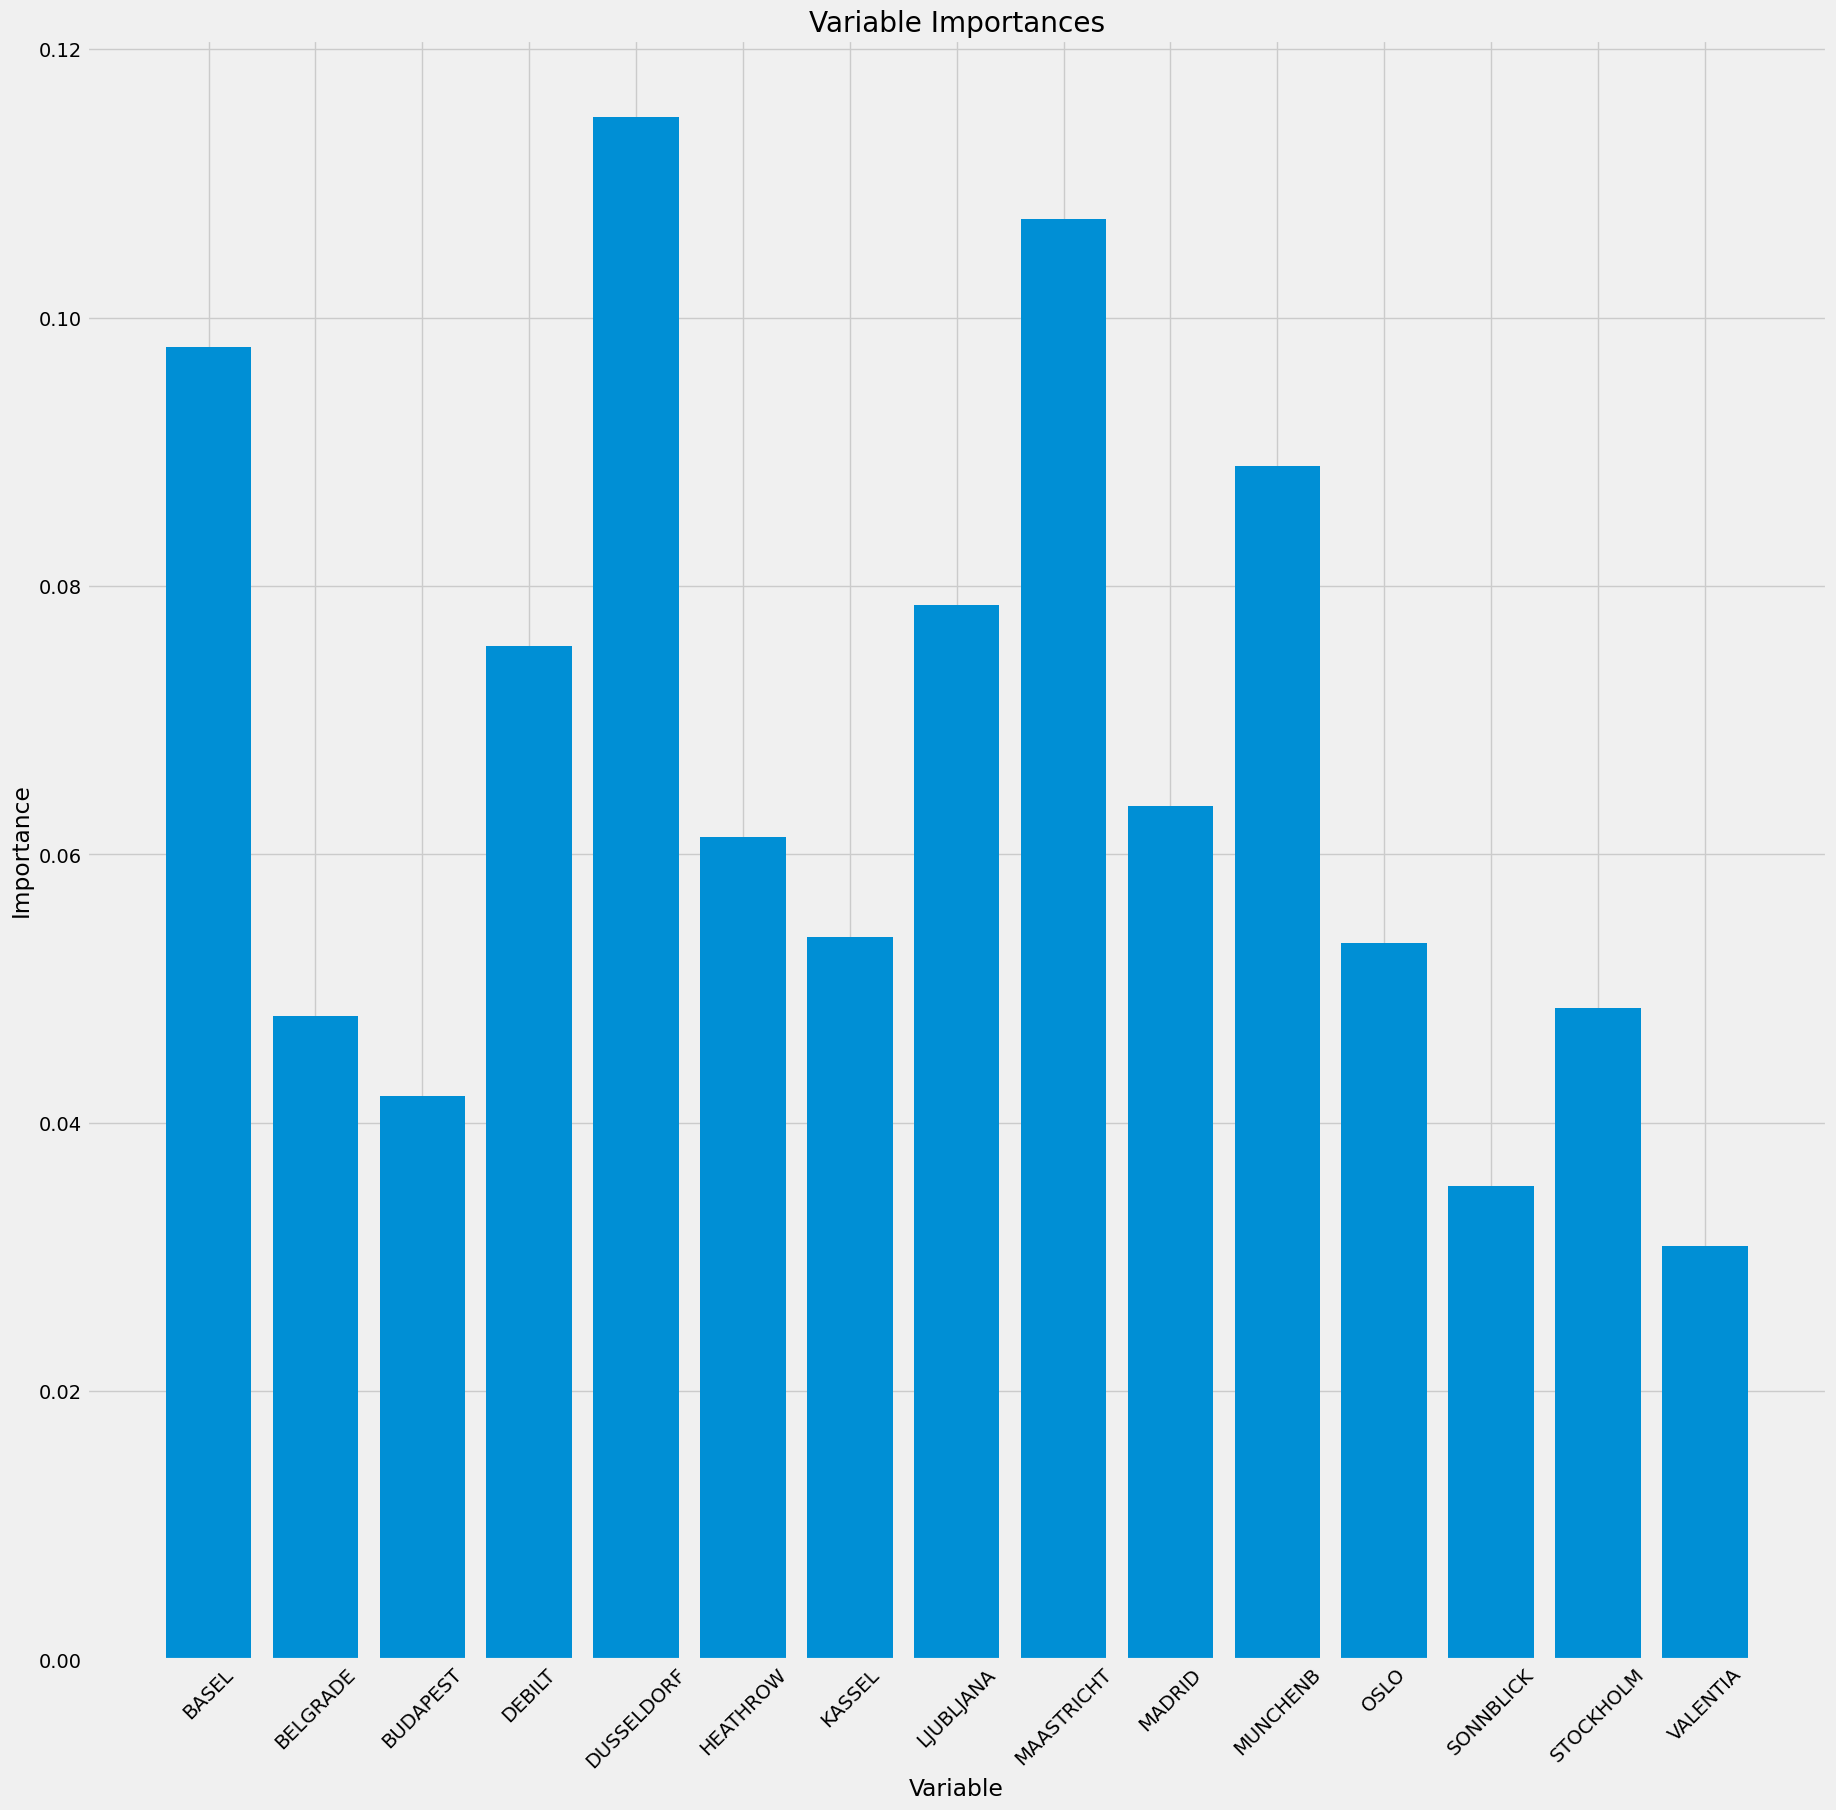

In [63]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(station_importances)))

plt.bar(x_values, station_importances, orientation = 'vertical')
plt.xticks(x_values, stations, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [64]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [65]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [66]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 20.06460747321447 minutes


In [67]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 0.6061546840958606


In [68]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6252178649237473
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 0.6061546840958606


In [69]:
clf3 = RandomForestClassifier(n_estimators = 410, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       n_estimators=410)

In [70]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.532244008714597
